# h1n1_vaccine_prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

# Data Visualisation

In [4]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [5]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [7]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [8]:
df.tail(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [9]:
df.sample()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
1377,1377,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,4.0,4.0,5.0,4.0,4.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,1


In [10]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
24144,24144,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,5.0,4.0,1.0,5.0,4.0,2.0,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,Non-MSA,2.0,1.0,0
19692,19692,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,NaN,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
20881,20881,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,4.0,2.0,4.0,4.0,4.0,65+ Years,12 Years,White,Female,NaN,Not Married,Own,Employed,Non-MSA,0.0,0.0,0
382,382,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,2.0,5.0,5.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0,1
11230,11230,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,4.0,1.0,2.0,5.0,2.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
2791,2791,3.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,3.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Male,NaN,Married,NaN,Employed,"MSA, Principle City",3.0,0.0,0
10734,10734,1.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,5.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,1.0,1
12956,12956,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,4.0,1.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,2.0,0.0,0
1547,1547,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,2.0,1.0,4.0,45 - 54 Years,12 Years,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
4849,4849,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0


In [11]:
df.shape

(26707, 34)

In [12]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [14]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [15]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [16]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


# Univariate

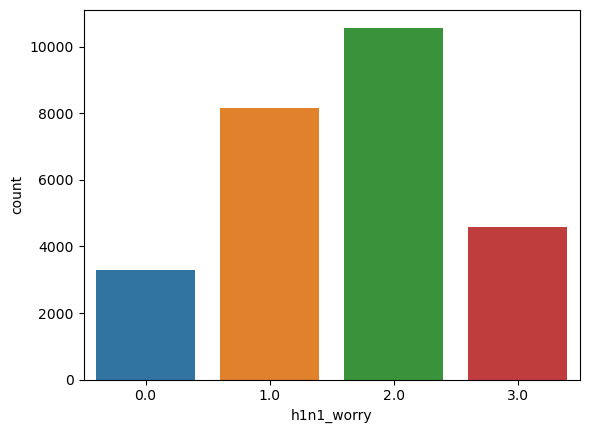

In [17]:
sns.countplot(x="h1n1_worry",data=df)
plt.show()

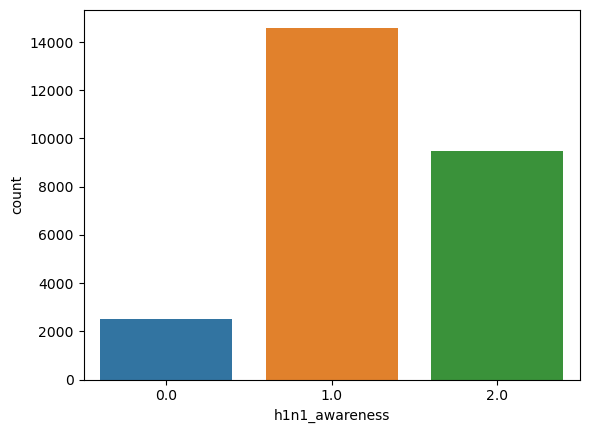

In [18]:
sns.countplot(x="h1n1_awareness",data=df)
plt.show()

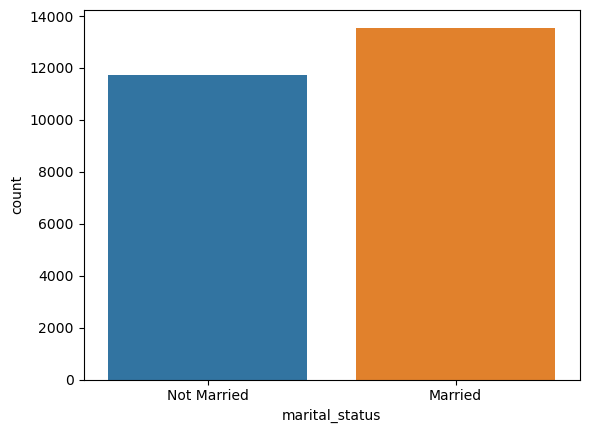

In [19]:
sns.countplot(x="marital_status",data=df)
plt.show()

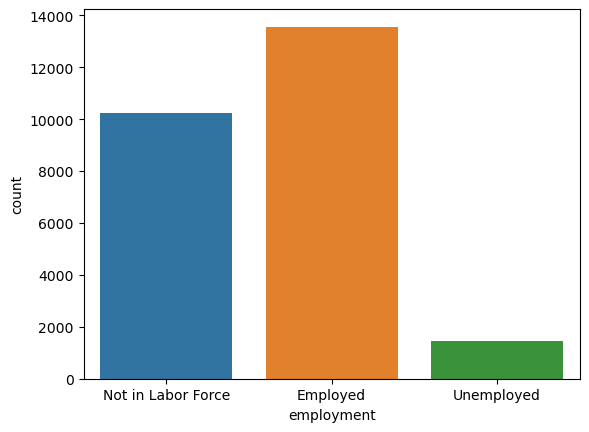

In [20]:
sns.countplot(x="employment",data=df)
plt.show()

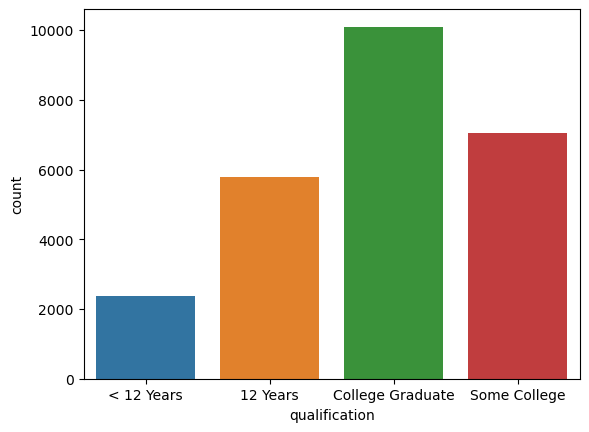

In [21]:
sns.countplot(x="qualification",data=df)
plt.show()

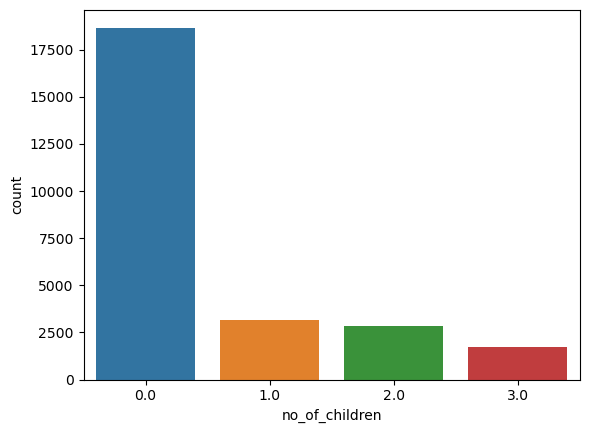

In [22]:
sns.countplot(x="no_of_children",data=df)
plt.show()

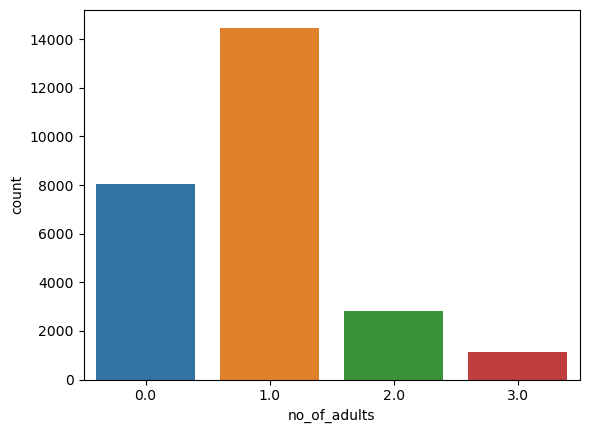

In [23]:
sns.countplot(x="no_of_adults",data=df)
plt.show()

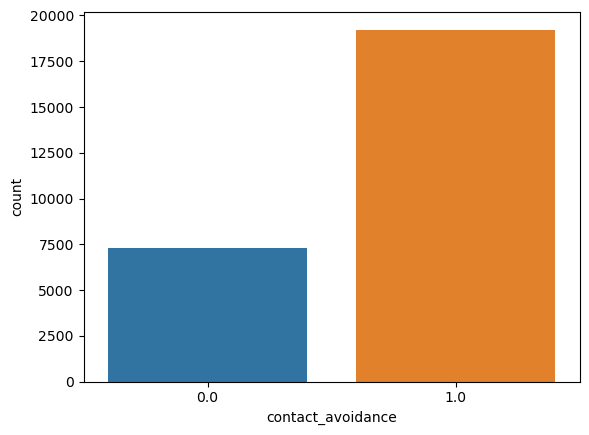

In [24]:
sns.countplot(x="contact_avoidance",data=df)
plt.show()

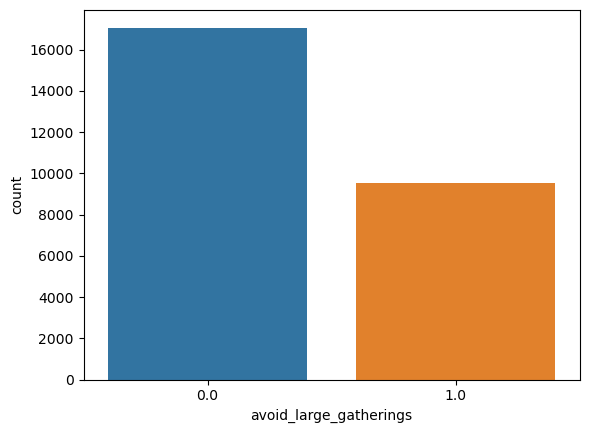

In [25]:
sns.countplot(x="avoid_large_gatherings",data=df)
plt.show()

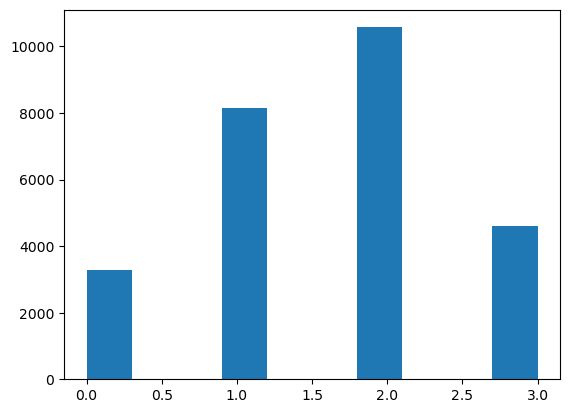

In [26]:
plt.hist("h1n1_worry",data=df)
plt.show()

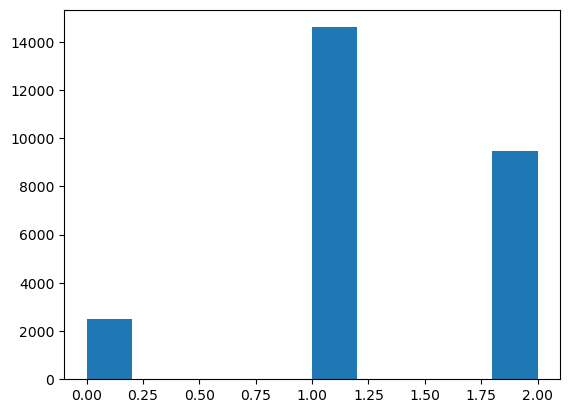

In [27]:
plt.hist("h1n1_awareness",data=df)
plt.show()

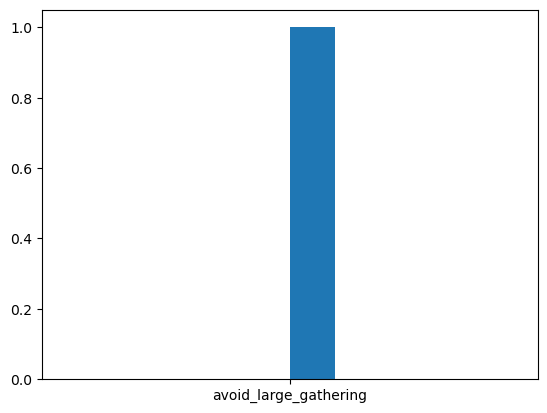

In [28]:
plt.hist("avoid_large_gathering",data=df)
plt.show()

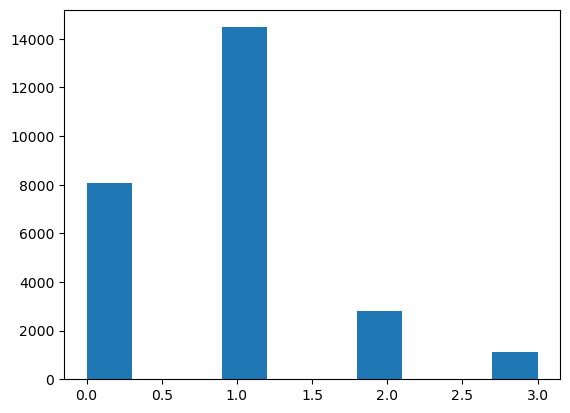

In [29]:
plt.hist("no_of_adults",data=df)
plt.show()

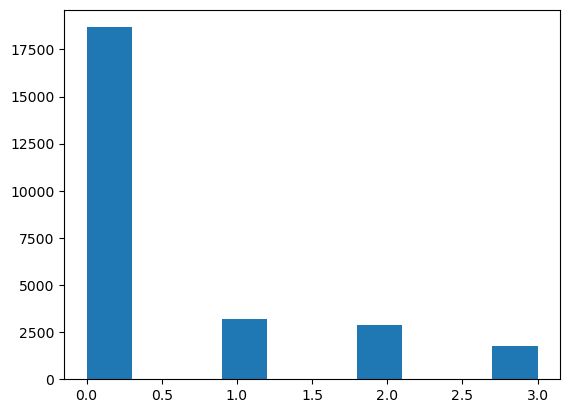

In [30]:
plt.hist("no_of_children",data=df)
plt.show()

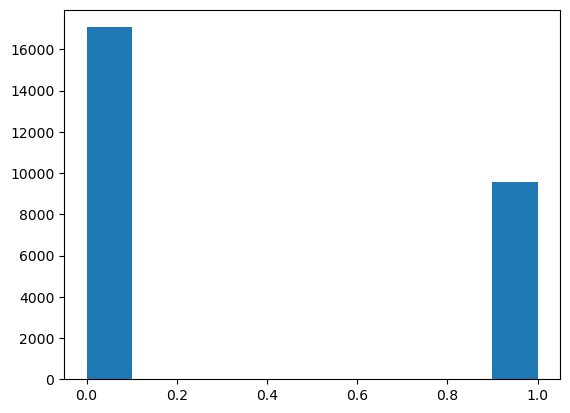

In [31]:
plt.hist("avoid_large_gatherings",data=df)
plt.show()

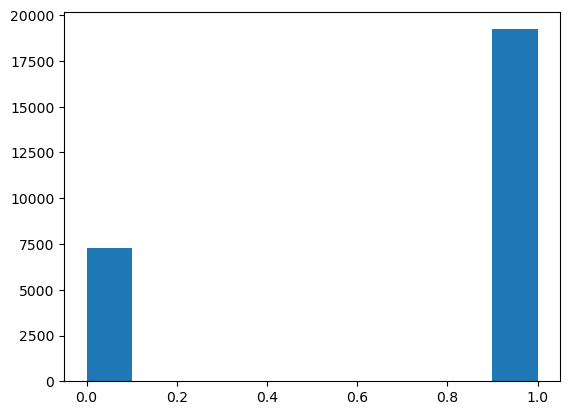

In [32]:
plt.hist("contact_avoidance",data=df)
plt.show()

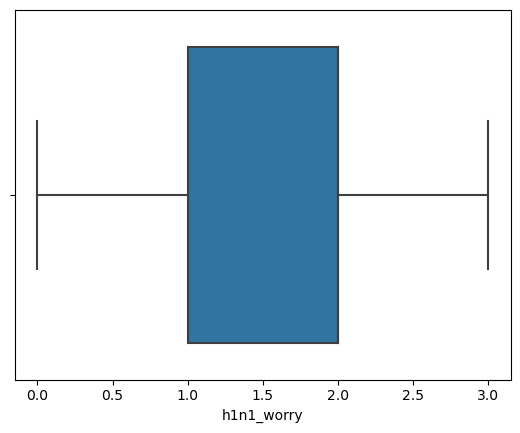

In [33]:
sns.boxplot(x="h1n1_worry",data=df)
plt.show()

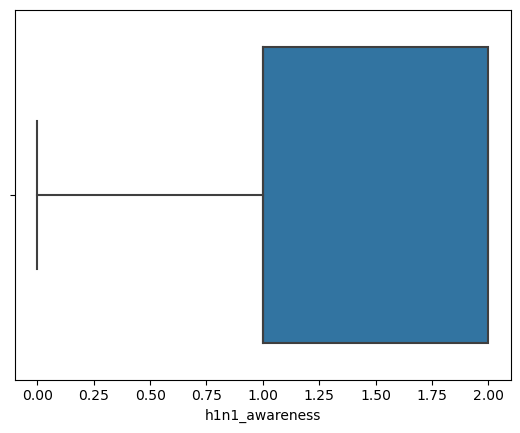

In [34]:
sns.boxplot(x="h1n1_awareness",data=df)
plt.show()

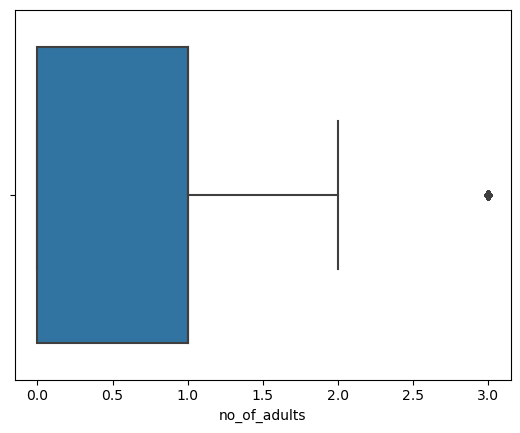

In [35]:
sns.boxplot(x="no_of_adults",data=df)
plt.show()

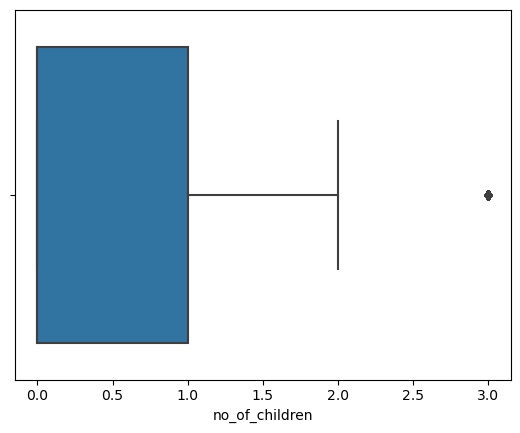

In [36]:
sns.boxplot(x="no_of_children",data=df)
plt.show()

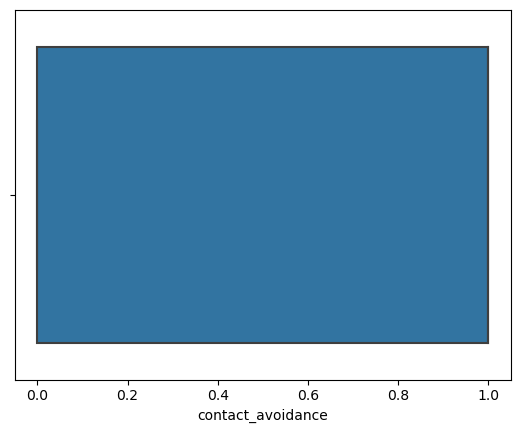

In [37]:
sns.boxplot(x="contact_avoidance",data=df)
plt.show()

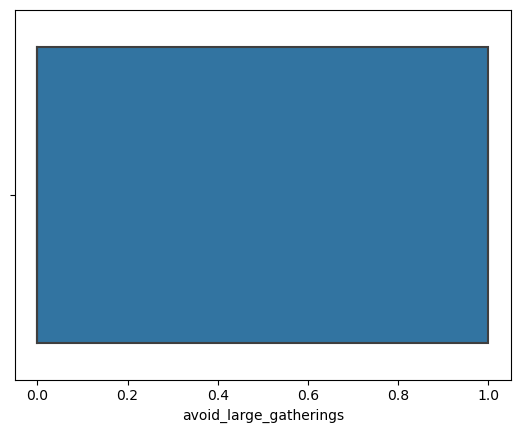

In [38]:
sns.boxplot(x="avoid_large_gatherings",data=df)
plt.show()

# Removing Outliers

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_adults,uppno_of_adults=remove_outlier(df['no_of_adults'])
df['no_of_adults']=np.where(df['no_of_adults']>uppno_of_adults,uppno_of_adults,df['no_of_adults'])
df['no_of_adults']=np.where(df['no_of_adults']<lowno_of_adults,lowno_of_adults,df['no_of_adults'])

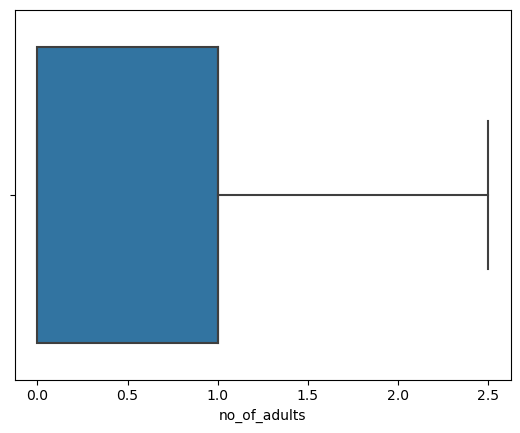

In [40]:
sns.boxplot(x="no_of_adults",data=df)
plt.show()

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowno_of_children,uppno_of_children=remove_outlier(df['no_of_children'])
df['no_of_children']=np.where(df['no_of_children']>uppno_of_children,uppno_of_children,df['no_of_children'])
df['no_of_children']=np.where(df['no_of_children']<lowno_of_children,lowno_of_children,df['no_of_children'])

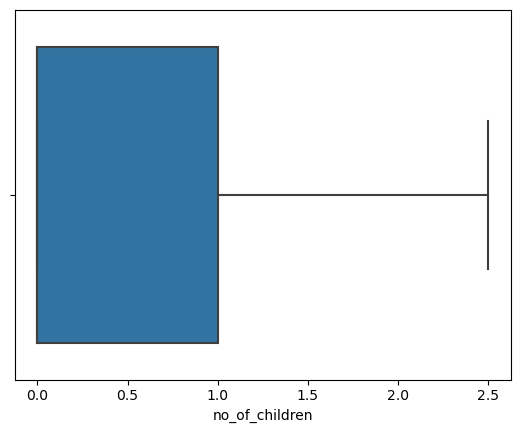

In [42]:
sns.boxplot(x="no_of_children",data=df)
plt.show()

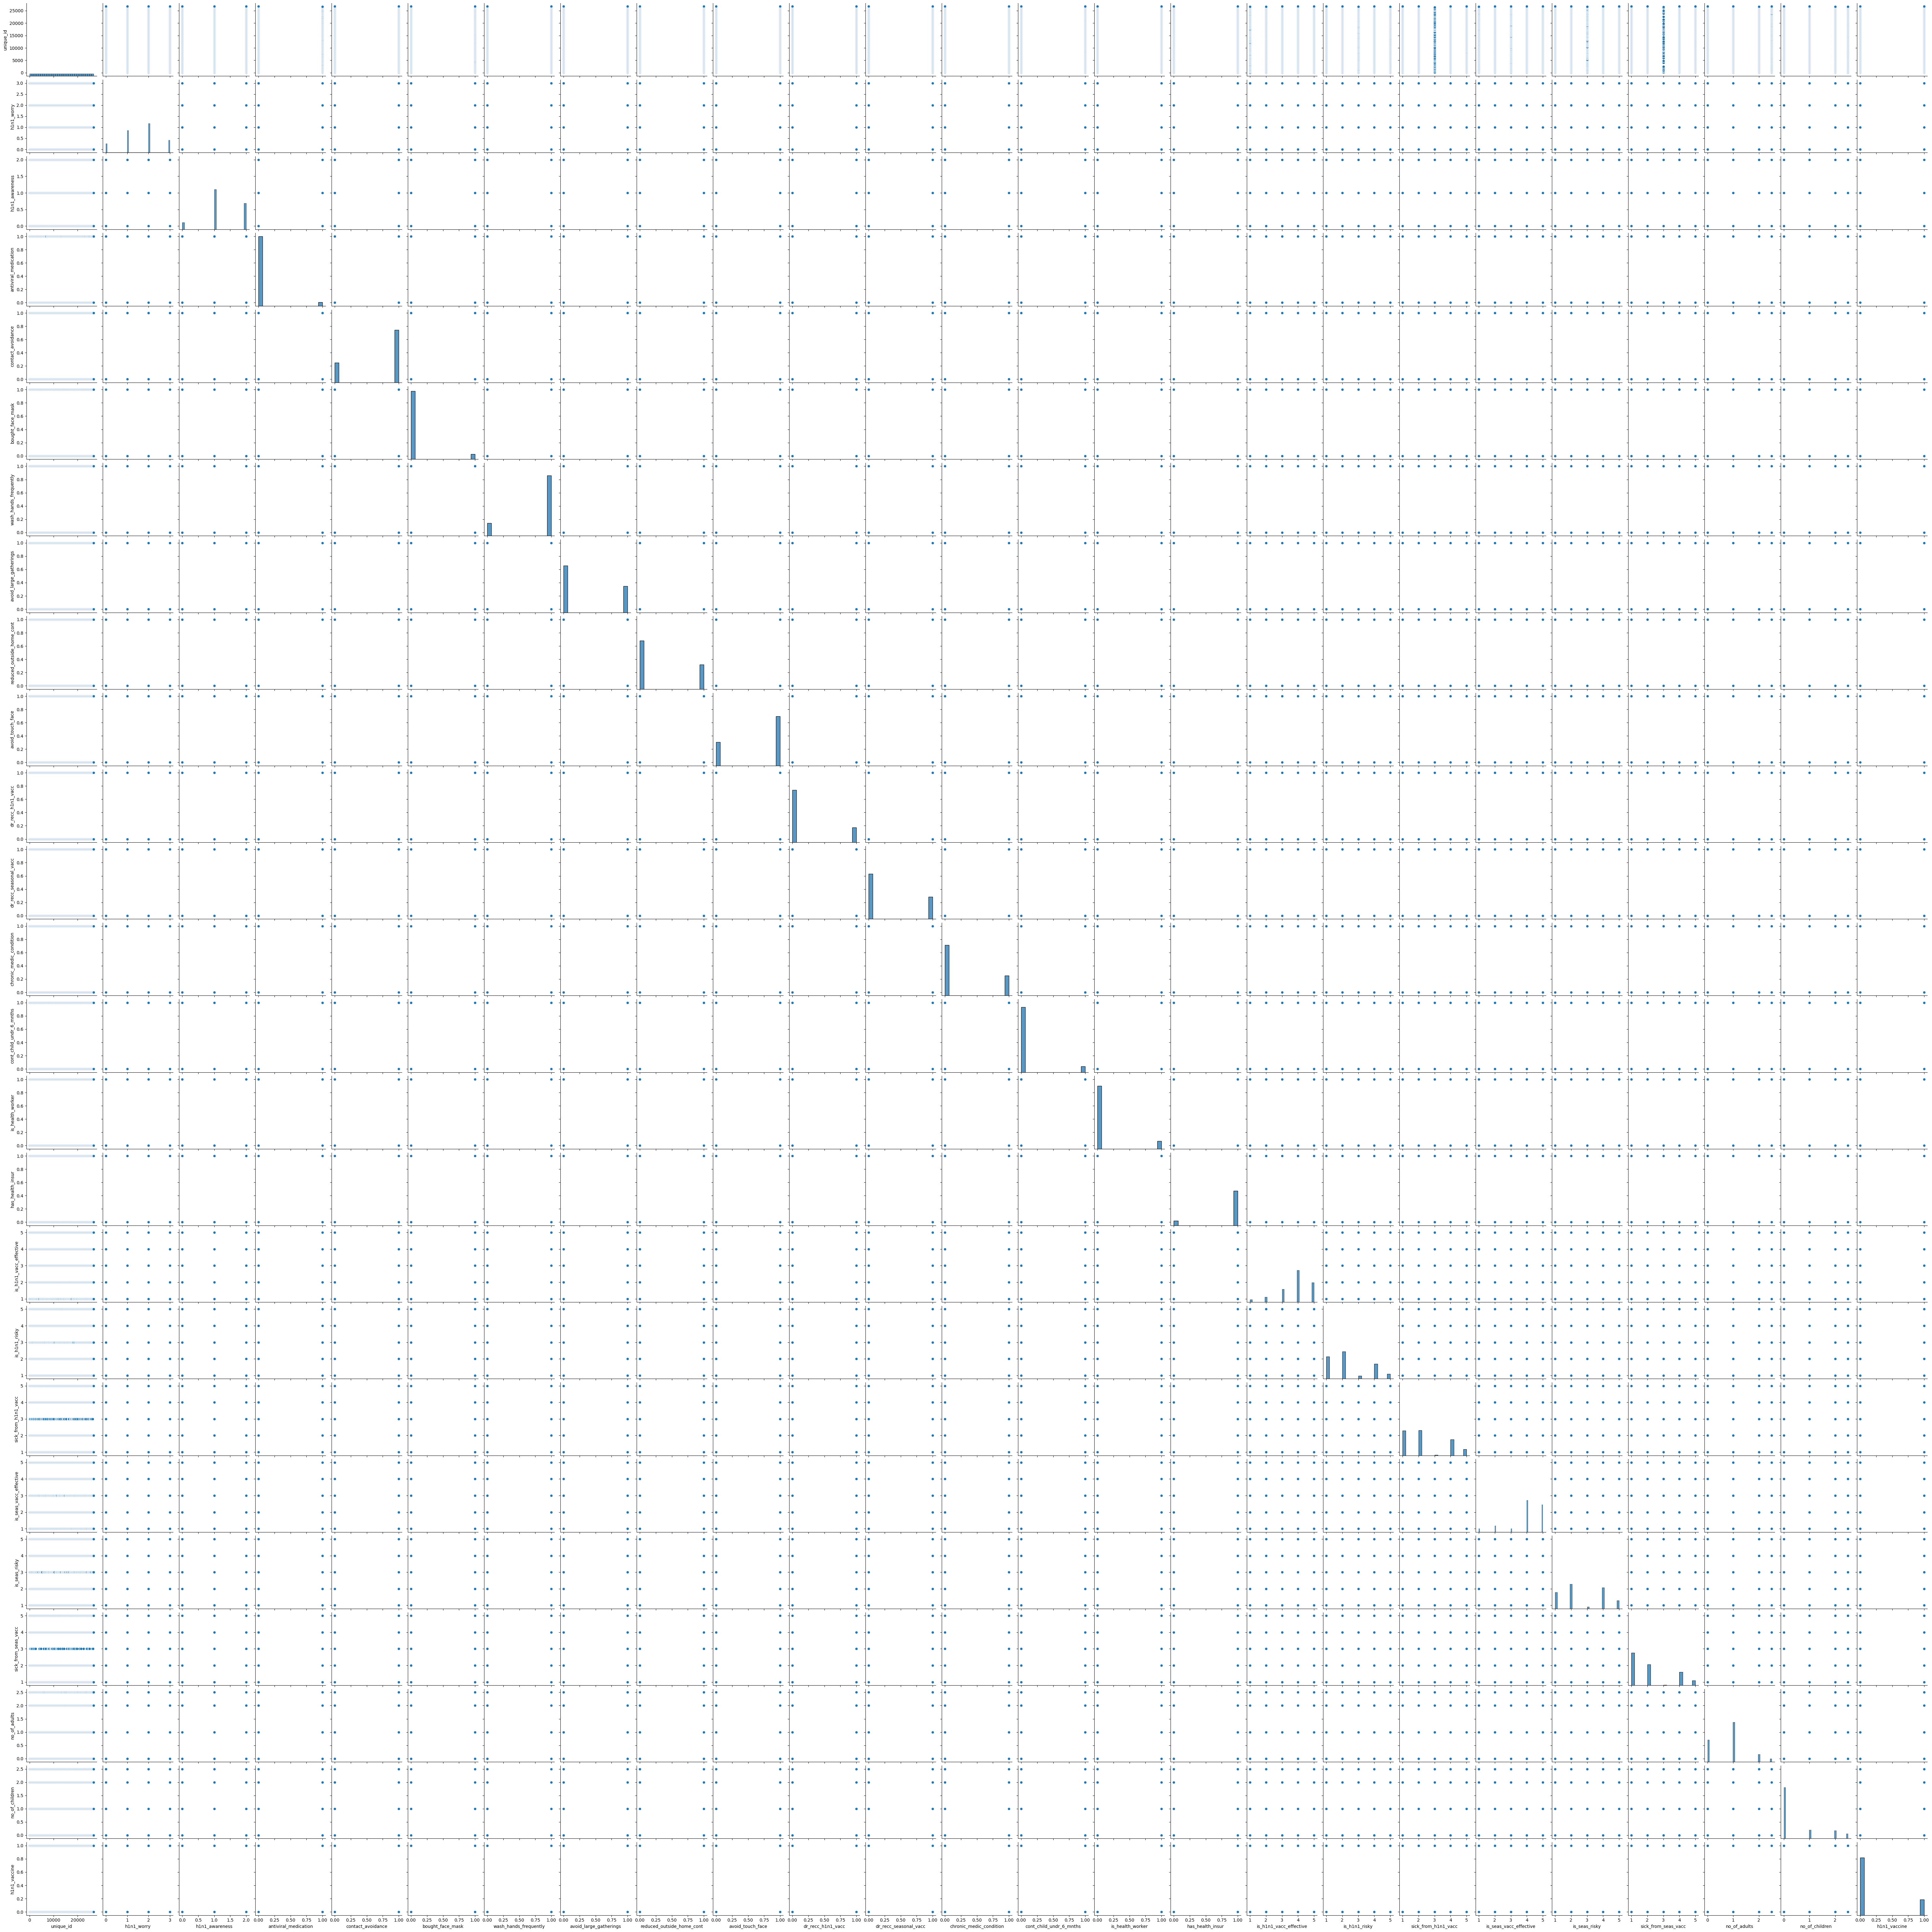

In [43]:
sns.pairplot(df)

# Bivariate

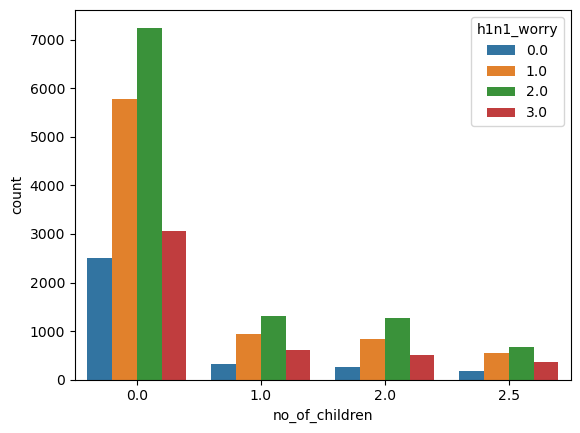

In [44]:
sns.countplot(x="no_of_children",hue="h1n1_worry",data=df)
plt.show()

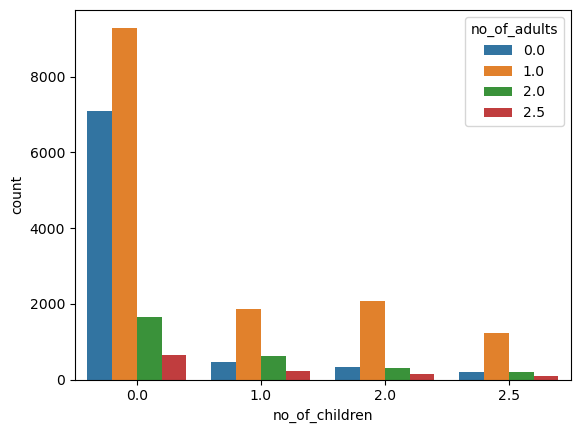

In [45]:
sns.countplot(x="no_of_children",hue="no_of_adults",data=df)
plt.show()

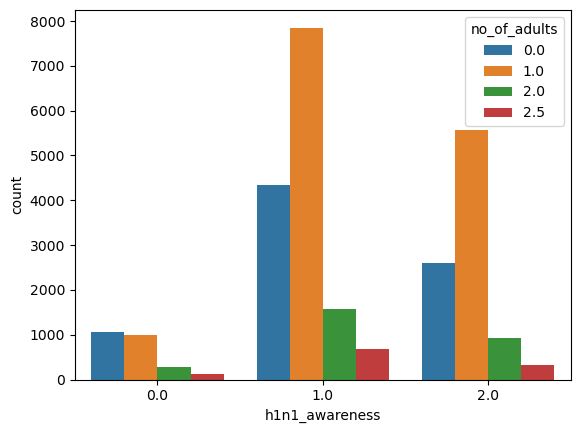

In [46]:
sns.countplot(x="h1n1_awareness",hue="no_of_adults",data=df)
plt.show()

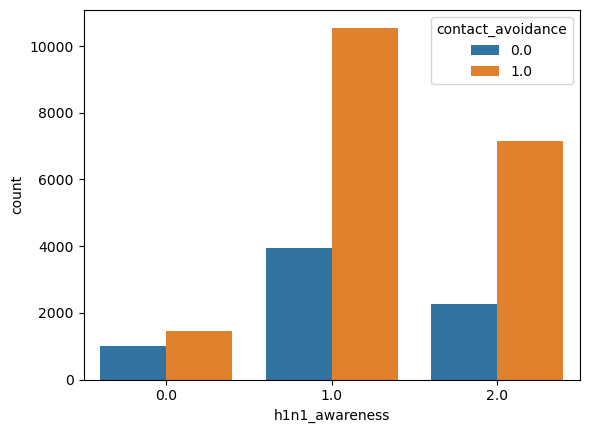

In [47]:
sns.countplot(x="h1n1_awareness",hue="contact_avoidance",data=df)
plt.show()

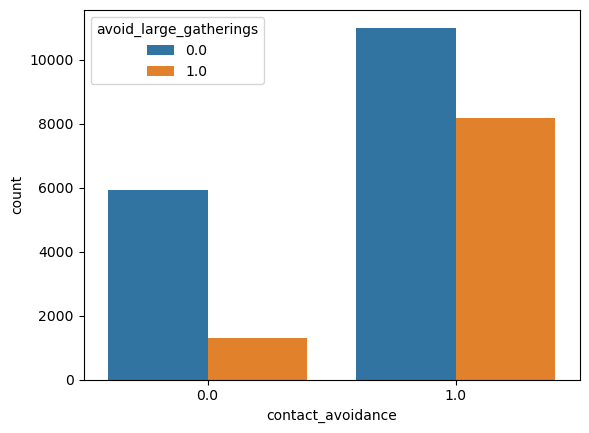

In [48]:
sns.countplot(x="contact_avoidance",hue="avoid_large_gatherings",data=df)
plt.show()

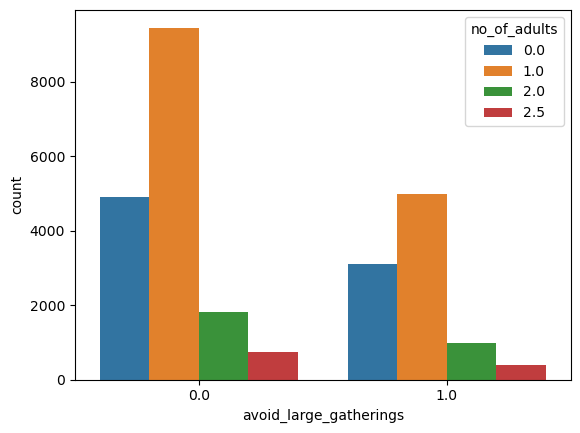

In [49]:
sns.countplot(x="avoid_large_gatherings",hue="no_of_adults",data=df)
plt.show()

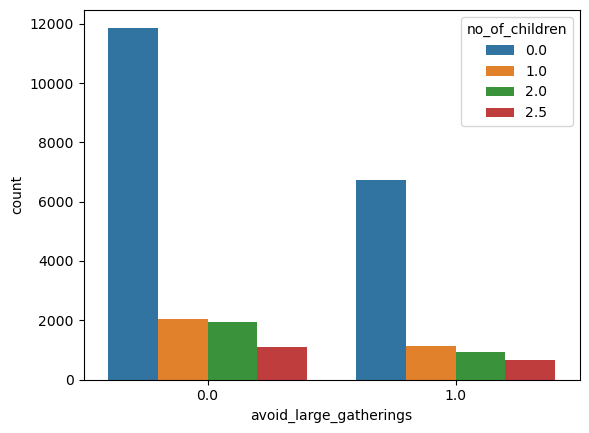

In [50]:
sns.countplot(x="avoid_large_gatherings",hue="no_of_children",data=df)
plt.show()

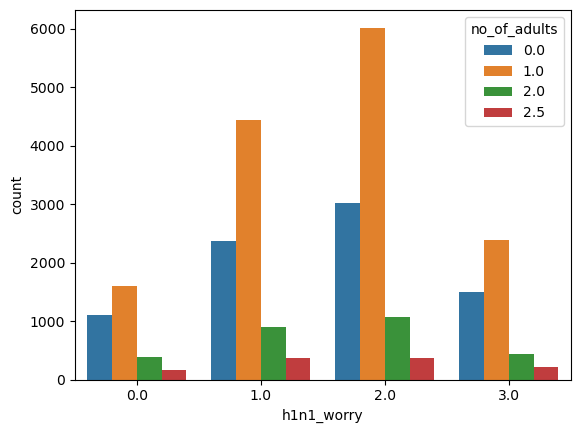

In [51]:
sns.countplot(x="h1n1_worry",hue="no_of_adults",data=df)
plt.show()

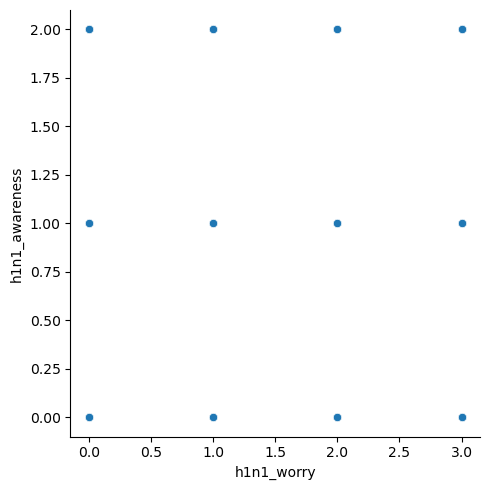

In [52]:
sns.relplot(x="h1n1_worry",y="h1n1_awareness",data=df)

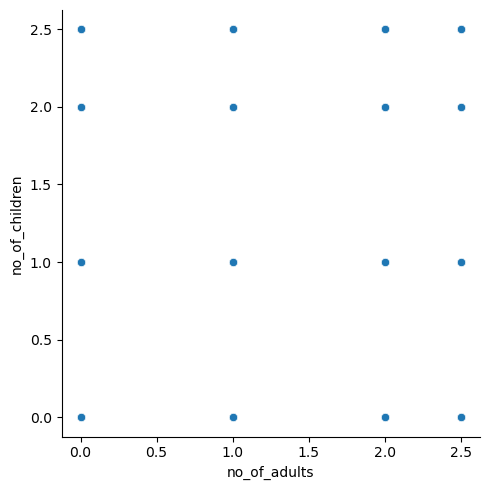

In [53]:
sns.relplot(x="no_of_adults",y="no_of_children",data=df)

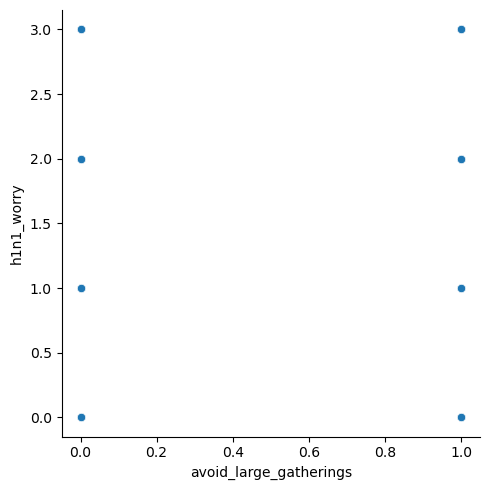

In [54]:
sns.relplot(x="avoid_large_gatherings",y="h1n1_worry",data=df)

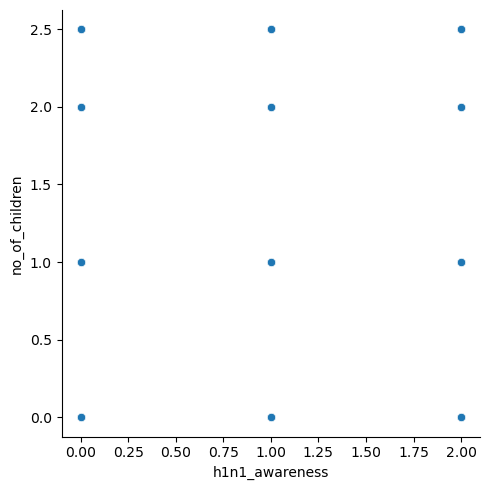

In [55]:
sns.relplot(x="h1n1_awareness",y="no_of_children",data=df)

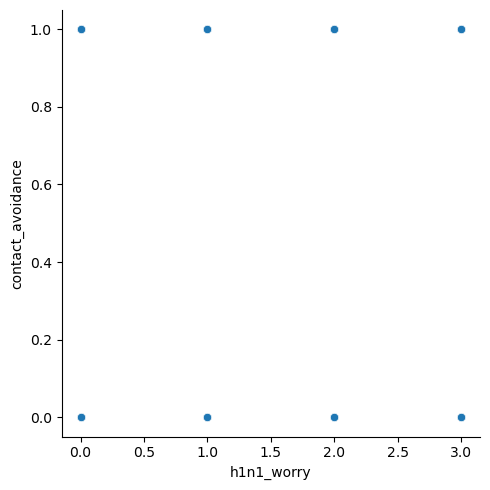

In [56]:
sns.relplot(x="h1n1_worry",y="contact_avoidance",data=df)

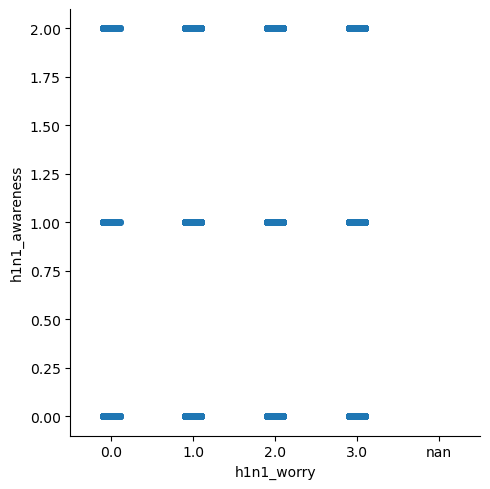

In [57]:
sns.catplot(x="h1n1_worry",y="h1n1_awareness",data=df)

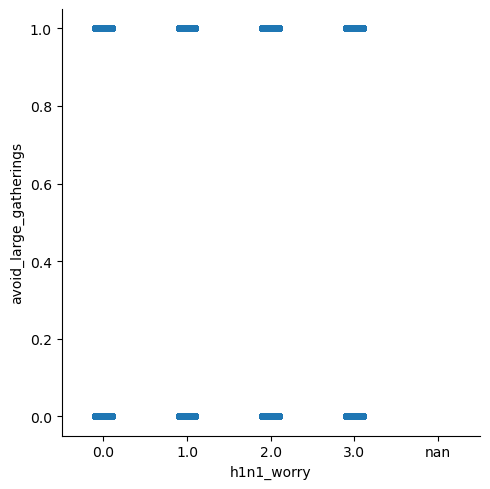

In [58]:
sns.catplot(x="h1n1_worry",y="avoid_large_gatherings",data=df)

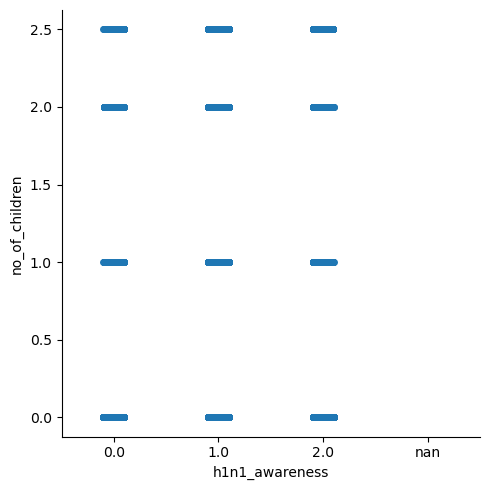

In [59]:
sns.catplot(x="h1n1_awareness",y="no_of_children",data=df)

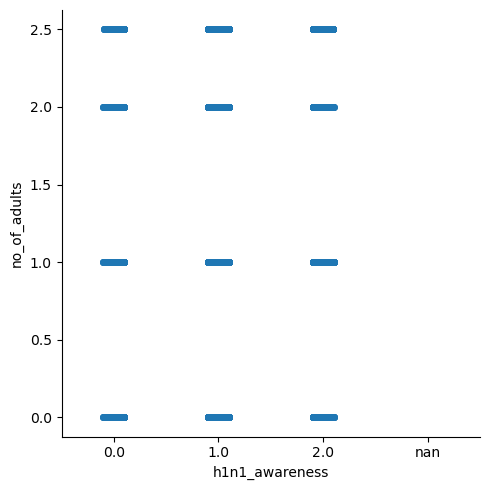

In [60]:
sns.catplot(x="h1n1_awareness",y="no_of_adults",data=df)

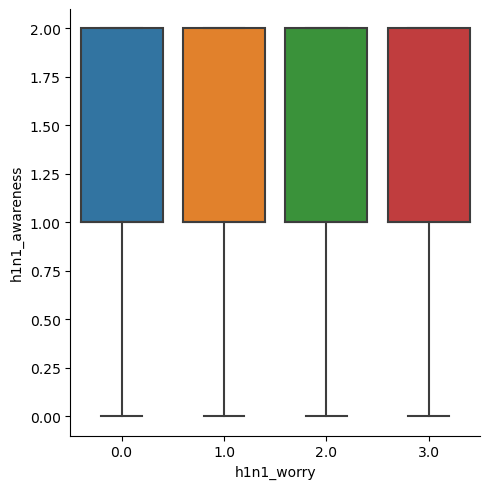

In [61]:
sns.catplot(x="h1n1_worry",y="h1n1_awareness",data=df,kind="box")

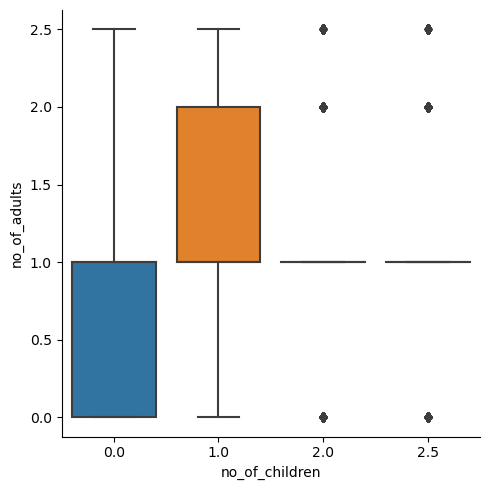

In [62]:
sns.catplot(x="no_of_children",y="no_of_adults",data=df,kind="box")

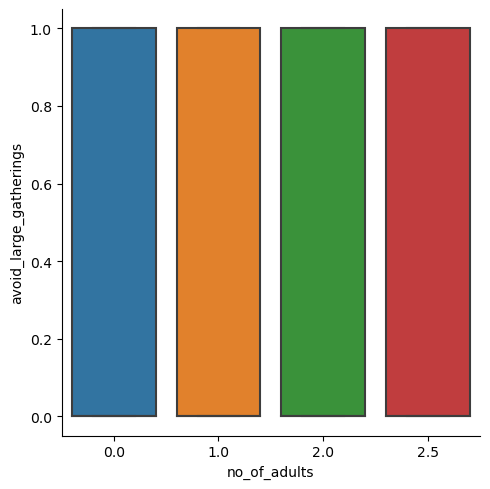

In [63]:
sns.catplot(x="no_of_adults",y="avoid_large_gatherings",data=df,kind="box")

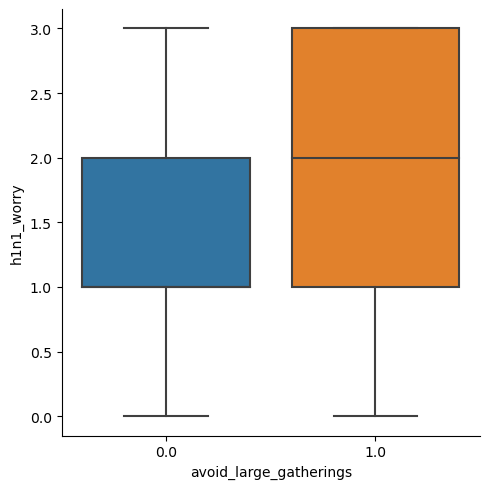

In [64]:
sns.catplot(x="avoid_large_gatherings",y="h1n1_worry",data=df,kind="box")

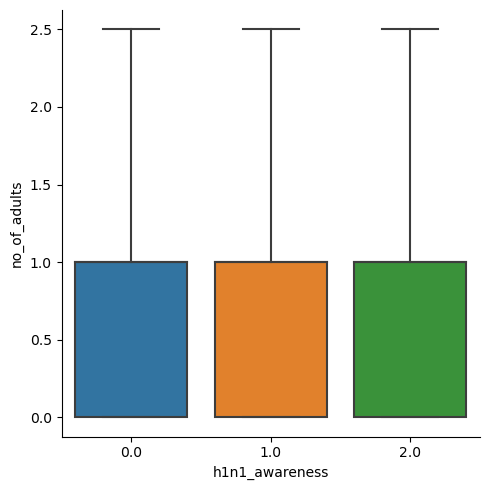

In [65]:
sns.catplot(x="h1n1_awareness",y="no_of_adults",data=df,kind="box")

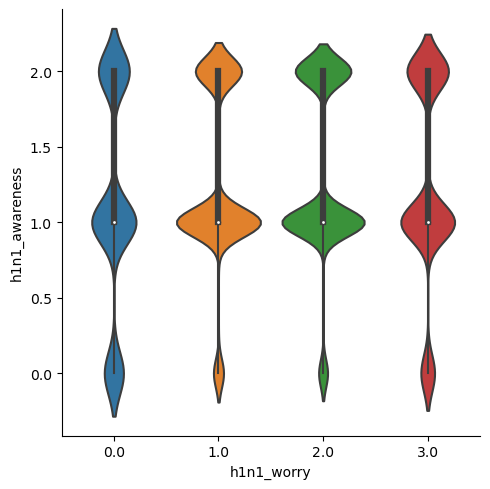

In [66]:
sns.catplot(x="h1n1_worry",y="h1n1_awareness",data=df,kind="violin")

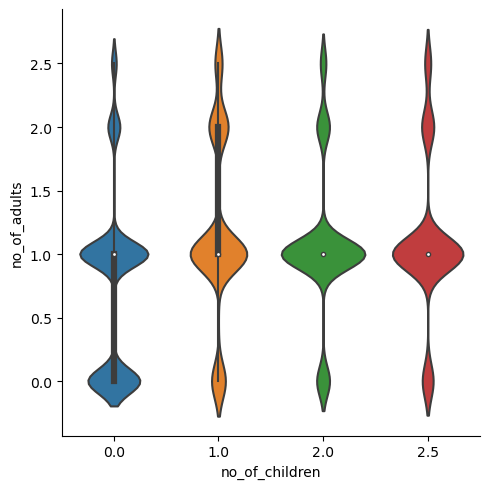

In [67]:
sns.catplot(x="no_of_children",y="no_of_adults",data=df,kind="violin")

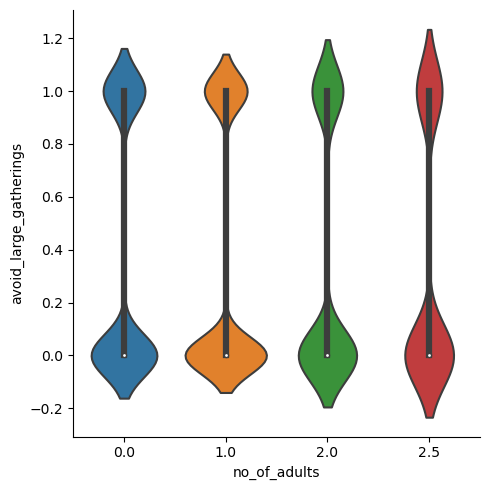

In [68]:
sns.catplot(x="no_of_adults",y="avoid_large_gatherings",data=df,kind="violin")

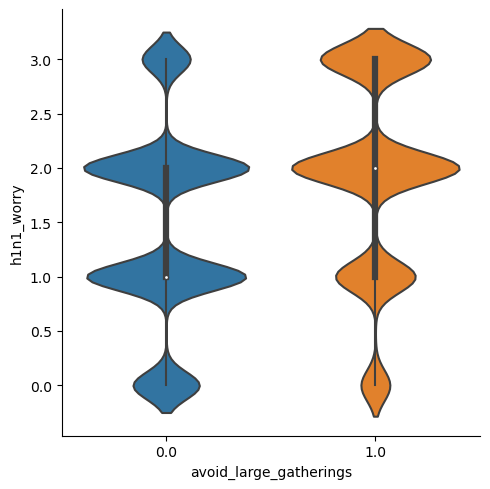

In [69]:
sns.catplot(x="avoid_large_gatherings",y="h1n1_worry",data=df,kind="violin")

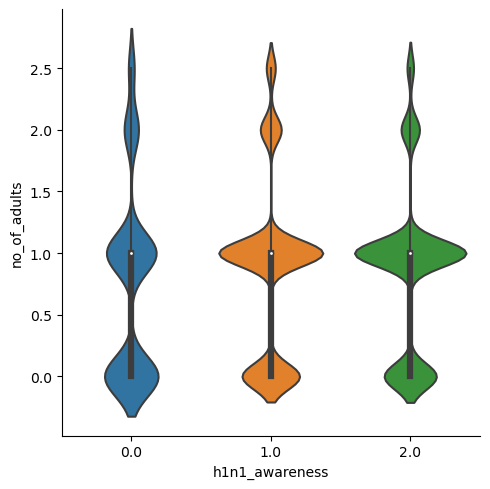

In [70]:
sns.catplot(x="h1n1_awareness",y="no_of_adults",data=df,kind="violin")

In [71]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [72]:
median1=df["h1n1_worry"].median()
median1

2.0

In [73]:
df["h1n1_worry"]=df["h1n1_worry"].replace(np.nan,median1)

In [74]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# REPLACING MISSING VALUES

In [75]:
median1=df["h1n1_awareness"].median()
median1

1.0

In [76]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(np.nan,median1)

In [77]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [78]:
median1=df["antiviral_medication"].median()
median1

0.0

In [79]:
df["antiviral_medication"]=df["antiviral_medication"].replace(np.nan,median1)

In [80]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [81]:
median1=df["contact_avoidance"].median()
median1

1.0

In [82]:
df["contact_avoidance"]=df["contact_avoidance"].replace(np.nan,median1)

In [83]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [84]:
median1=df["bought_face_mask"].median()
median1

0.0

In [85]:
df["bought_face_mask"]=df["bought_face_mask"].replace(np.nan,median1)

In [86]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [87]:
median1=df["wash_hands_frequently"].median()
median1

1.0

In [88]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(np.nan,median1)

In [89]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [90]:
median1=df["avoid_large_gatherings"].median()
median1

0.0

In [91]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(np.nan,median1)

In [92]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [93]:
median1=df["reduced_outside_home_cont"].median()
median1

0.0

In [94]:
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(np.nan,median1)

In [95]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [96]:
median1=df["avoid_touch_face"].median()
median1

1.0

In [97]:
df["avoid_touch_face"]=df["avoid_touch_face"].replace(np.nan,median1)

In [98]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [99]:
median1=df["dr_recc_h1n1_vacc"].median()
median1

0.0

In [100]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(np.nan,median1)

In [101]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [102]:
median1=df["dr_recc_seasonal_vacc"].median()
median1

0.0

In [103]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(np.nan,median1)

In [104]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [105]:
median1=df["chronic_medic_condition"].median()
median1

0.0

In [106]:
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(np.nan,median1)

In [107]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [108]:
median1=df["cont_child_undr_6_mnths"].median()
median1

0.0

In [109]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(np.nan,median1)

In [110]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [111]:
median1=df["is_health_worker"].median()
median1

0.0

In [112]:
df["is_health_worker"]=df["is_health_worker"].replace(np.nan,median1)

In [113]:
df.isnull().sum()

unique_id                        0
h1n1_worry                       0
h1n1_awareness                   0
antiviral_medication             0
contact_avoidance                0
bought_face_mask                 0
wash_hands_frequently            0
avoid_large_gatherings           0
reduced_outside_home_cont        0
avoid_touch_face                 0
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition          0
cont_child_undr_6_mnths          0
is_health_worker                 0
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [114]:
median1=df["has_health_insur"].median()
median1

1.0

In [115]:
df["has_health_insur"]=df["has_health_insur"].replace(np.nan,median1)

In [116]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [117]:
median1=df["is_h1n1_vacc_effective"].median()
median1

4.0

In [118]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(np.nan,median1)

In [119]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [120]:
median1=df["is_h1n1_risky"].median()
median1

2.0

In [121]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(np.nan,median1)

In [122]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [123]:
median1=df["sick_from_seas_vacc"].median()
median1

2.0

In [124]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(np.nan,median1)

In [125]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [126]:
mode1=df["age_bracket"].mode()[0]
mode1

'65+ Years'

In [127]:
df["age_bracket"]=df["age_bracket"].replace(np.nan,mode1)

In [128]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [129]:
median1=df["sick_from_h1n1_vacc"].median()
median1

2.0

In [130]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(np.nan,median1)

In [131]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [132]:
median1=df["is_seas_vacc_effective"].median()
median1

4.0

In [133]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(np.nan,median1)

In [134]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                 514
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [135]:
median1=df["is_seas_risky"].median()
median1

2.0

In [136]:
df["is_seas_risky"]=df["is_seas_risky"].replace(np.nan,median1)

In [137]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [138]:
median1=df["qualification"].mode()[0]
median1

'College Graduate'

In [139]:
df["qualification"]=df["qualification"].replace(np.nan,median1)

In [140]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [141]:
median1=df["income_level"].mode()[0]
median1

'<= $75,000, Above Poverty'

In [142]:
df["income_level"]=df["income_level"].replace(np.nan,median1)

In [143]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status               1408
housing_status               2042
employment    

In [144]:
median1=df["marital_status"].mode()[0]
median1

'Married'

In [145]:
df["marital_status"]=df["marital_status"].replace(np.nan,median1)

In [146]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status               2042
employment    

In [147]:
median1=df["housing_status"].mode()[0]
median1

'Own'

In [148]:
df["housing_status"]=df["housing_status"].replace(np.nan,median1)

In [149]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status                  0
employment    

In [150]:
mode1=df["employment"].mode()
mode1

0    Employed
Name: employment, dtype: object

In [151]:
df["employment"]=df["employment"].replace(np.nan,median1)

In [152]:
df.isnull().sum()

unique_id                      0
h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                  0
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                  0
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa

In [153]:
median1=df["no_of_adults"].median()
median1

1.0

In [154]:
df["no_of_adults"]=df["no_of_adults"].replace(np.nan,median1)

In [155]:
df.isnull().sum()

unique_id                      0
h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                  0
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                  0
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa

In [156]:
median1=df["no_of_children"].median()
median1

0.0

In [157]:
df["no_of_children"]=df["no_of_children"].replace(np.nan,median1)

In [158]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# Encoding

In [159]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

# Seaborn


In [160]:
df=df.drop(["unique_id","employment","income_level","race","qualification","h1n1_worry","h1n1_awareness" ,"contact_avoidance","bought_face_mask","wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","avoid_touch_face","dr_recc_seasonal_vacc","is_health_worker","marital_status","housing_status","census_msa"],axis=1)

In [161]:
df.isnull().sum()

antiviral_medication       0
dr_recc_h1n1_vacc          0
chronic_medic_condition    0
cont_child_undr_6_mnths    0
has_health_insur           0
is_h1n1_vacc_effective     0
is_h1n1_risky              0
sick_from_h1n1_vacc        0
is_seas_vacc_effective     0
is_seas_risky              0
sick_from_seas_vacc        0
age_bracket                0
sex                        0
no_of_adults               0
no_of_children             0
h1n1_vaccine               0
dtype: int64

In [162]:
df.shape

(26707, 16)

In [163]:
df.dtypes

antiviral_medication       float64
dr_recc_h1n1_vacc          float64
chronic_medic_condition    float64
cont_child_undr_6_mnths    float64
has_health_insur           float64
is_h1n1_vacc_effective     float64
is_h1n1_risky              float64
sick_from_h1n1_vacc        float64
is_seas_vacc_effective     float64
is_seas_risky              float64
sick_from_seas_vacc        float64
age_bracket                 object
sex                         object
no_of_adults               float64
no_of_children             float64
h1n1_vaccine                 int64
dtype: object

In [164]:
df=pd.get_dummies(df,columns=["sex","no_of_adults","no_of_children","age_bracket"])

In [165]:
df.head()

,antiviral_medication,dr_recc_h1n1_vacc,chronic_medic_condition,cont_child_undr_6_mnths,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,h1n1_vaccine,sex_Female,sex_Male,no_of_adults_0.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_2.5,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_2.5,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False
2,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False
3,0.0,0.0,1.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False


In [166]:
df.shape

(26707, 27)

In [167]:
df.dtypes

antiviral_medication         float64
dr_recc_h1n1_vacc            float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
h1n1_vaccine                   int64
sex_Female                      bool
sex_Male                        bool
no_of_adults_0.0                bool
no_of_adults_1.0                bool
no_of_adults_2.0                bool
no_of_adults_2.5                bool
no_of_children_0.0              bool
no_of_children_1.0              bool
no_of_children_2.0              bool
no_of_children_2.5              bool
age_bracket_18 - 34 Years       bool
age_bracket_35 - 44 Years       bool
age_bracket_45 - 54 Years       bool
age_bracket_55 - 64 Years       bool
age_bracket_65+ Years           bool
d

In [168]:
df.isnull().sum()

antiviral_medication         0
dr_recc_h1n1_vacc            0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
h1n1_vaccine                 0
sex_Female                   0
sex_Male                     0
no_of_adults_0.0             0
no_of_adults_1.0             0
no_of_adults_2.0             0
no_of_adults_2.5             0
no_of_children_0.0           0
no_of_children_1.0           0
no_of_children_2.0           0
no_of_children_2.5           0
age_bracket_18 - 34 Years    0
age_bracket_35 - 44 Years    0
age_bracket_45 - 54 Years    0
age_bracket_55 - 64 Years    0
age_bracket_65+ Years        0
dtype: int64

# Logistic Regression

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [170]:
Y=df[["h1n1_vaccine"]]
X=df.drop(["h1n1_vaccine"],axis=1)

In [171]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1,train_size=0.8)

In [172]:
model_log=LogisticRegression()

In [173]:
model_log.fit(X_train,Y_train)

LogisticRegression()

# Heat Map

In [174]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<Axes: >

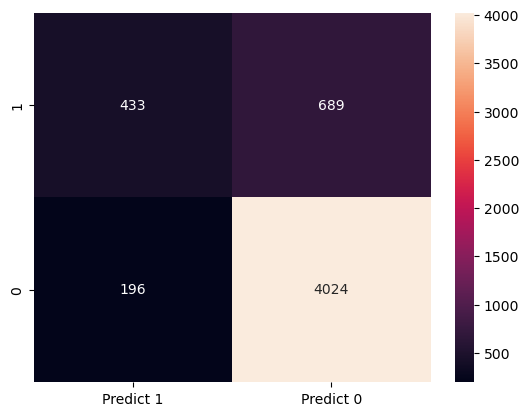

In [175]:
prediction=model_log.predict(X_test)
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,prediction,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm, annot=True,fmt='g')

# Descision Tree Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
model_dtc=DecisionTreeClassifier(max_depth=3)

In [178]:
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [179]:
model_dtc.score(X_train,Y_train)

0.8228410952492394

In [180]:
model_dtc.score(X_test,Y_test)

0.8311493822538375

# Bagging Model

In [181]:
from sklearn.ensemble import BaggingClassifier


In [182]:
model_bcr=BaggingClassifier(n_estimators=33,max_samples=0.9,base_estimator=model_dtc)


In [183]:
model_bcr.fit(X_train,Y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.9, n_estimators=33)

In [184]:
model_bcr.score(X_train,Y_train)

0.8236835946641704

In [185]:
model_bcr.score(X_test,Y_test)

0.832646948708349

# Boosting Model

In [186]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [187]:
model_abc=AdaBoostClassifier(n_estimators=20)
model_gbc=GradientBoostingClassifier()
model_rfc=RandomForestClassifier(n_estimators=50,max_samples=10)

In [188]:
model_abc.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=20)

In [189]:
model_abc.score(X_train,Y_train)

0.8281769248771355

In [190]:
model_abc.score(X_test,Y_test)

0.8347061025833021

In [191]:
model_gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [192]:
model_gbc.score(X_train,Y_train)

0.8347296981043764

In [193]:
model_gbc.score(X_test,Y_test)

0.8339573193560464

In [194]:
model_rfc.fit(X_train,Y_train)

RandomForestClassifier(max_samples=10, n_estimators=50)

In [195]:
model_rfc.score(X_train,Y_train)

0.7868476480224667

In [196]:
model_rfc.score(X_test,Y_test)

0.7899663047547735

# SVC

In [197]:
from sklearn.svm import SVC
model_svc=SVC(kernel='linear',C=2,)
model_svc.fit(X_train,Y_train)

SVC(C=2, kernel='linear')

In [198]:
model_svc.score(X_train,Y_train)

0.8152586005148608

In [199]:
model_svc.score(X_test,Y_test)

0.8214152002995133